# Predicting Laptop Prices

## Exploratory Data Analysis (EDA)

In [420]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

In [421]:
data = pd.read_csv(r'C:\Users\HP\KaggleDatasets\laptop_dataset.csv')

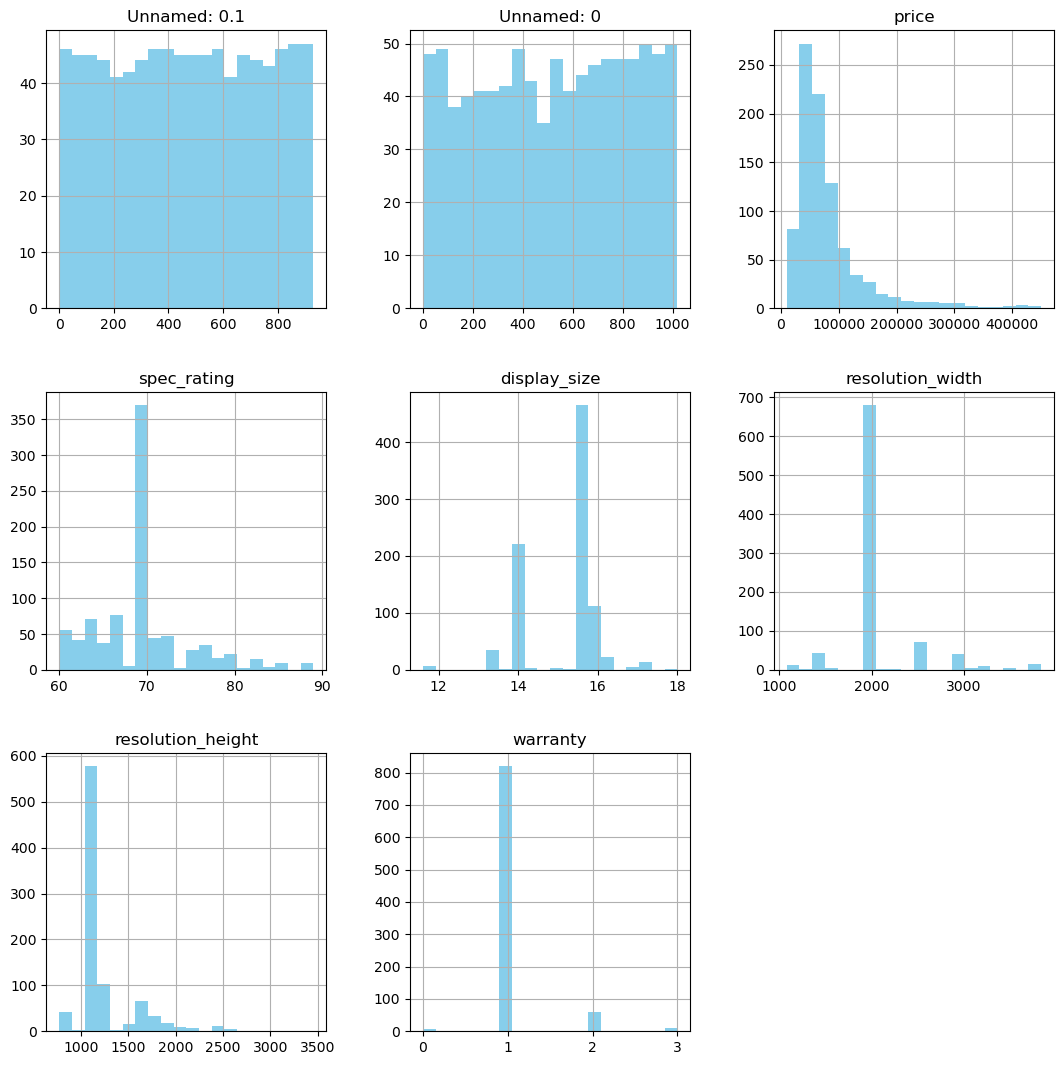

In [422]:
data.hist(bins=20, figsize=(13, 13), color="skyblue")
plt.show()

In [423]:
print(data.head())

   Unnamed: 0.1  Unnamed: 0   brand                                  name  \
0             0           0      HP      Victus 15-fb0157AX Gaming Laptop   
1             1           1      HP                   15s-fq5007TU Laptop   
2             2           2    Acer                  One 14 Z8-415 Laptop   
3             3           3  Lenovo  Yoga Slim 6 14IAP8 82WU0095IN Laptop   
4             4           4   Apple       MacBook Air 2020 MGND3HN Laptop   

   price  spec_rating                      processor  \
0  49900    73.000000      5th Gen AMD Ryzen 5 5600H   
1  39900    60.000000   12th Gen Intel Core i3 1215U   
2  26990    69.323529  11th Gen Intel Core i3 1115G4   
3  59729    66.000000   12th Gen Intel Core i5 1240P   
4  69990    69.323529                       Apple M1   

                              CPU   Ram Ram_type    ROM ROM_type  \
0           Hexa Core, 12 Threads   8GB     DDR4  512GB      SSD   
1  Hexa Core (2P + 4E), 8 Threads   8GB     DDR4  512GB      SSD

In [424]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [425]:
missing_columns = data.columns[data.isnull().any()]
print(missing_columns)

Index([], dtype='object')


In [426]:
for column in data.columns:
    print(f'{column} : {data[column].isnull().sum()}')

Unnamed: 0.1 : 0
Unnamed: 0 : 0
brand : 0
name : 0
price : 0
spec_rating : 0
processor : 0
CPU : 0
Ram : 0
Ram_type : 0
ROM : 0
ROM_type : 0
GPU : 0
display_size : 0
resolution_width : 0
resolution_height : 0
OS : 0
warranty : 0


**Dalam dataset ini tidak terdapat kolom yang tidak memiliki data, ini memungkinkan kita untuk mendapat prediksi yang akurat**

In [428]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,467.135498,521.382979,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,270.209769,299.916605,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,0.000000,0.000000,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,235.000000,265.000000,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,467.000000,531.000000,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,702.000000,784.000000,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,930.000000,1019.000000,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [429]:
data.drop('Unnamed: 0.1', axis=1, inplace=True)

In [430]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [431]:
data.describe()

,price,spec_rating,display_size,resolution_width,resolution_height,warranty
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,79907.409854,69.379026,15.173751,2035.393057,1218.324748,1.079507
std,60880.043823,5.541555,0.939095,426.076009,326.756883,0.326956
min,9999.000000,60.000000,11.600000,1080.000000,768.000000,0.000000
25%,44500.000000,66.000000,14.000000,1920.000000,1080.000000,1.000000
50%,61990.000000,69.323529,15.600000,1920.000000,1080.000000,1.000000
75%,90990.000000,71.000000,15.600000,1920.000000,1200.000000,1.000000
max,450039.000000,89.000000,18.000000,3840.000000,3456.000000,3.000000


In [432]:
data.describe(exclude=np.number)

,brand,name,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,OS
count,893,893,893,893,893,893,893,893,893,893
unique,30,815,184,29,7,12,7,2,134,14
top,HP,Inspiron 3525 Laptop,12th Gen Intel Core i5 1235U,"Quad Core, 8 Threads",16GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,Windows 11 OS
freq,186,4,49,130,456,499,634,872,107,782


In [433]:
brand = data['brand'].value_counts().sort_values(ascending=False) 

In [434]:
brand

brand
HP           186
Lenovo       169
Asus         157
Dell         107
Acer          84
MSI           65
Samsung       28
Apple         16
Infinix       15
LG             9
Xiaomi         8
Gigabyte       8
Fujitsu        6
Zebronics      4
Ultimus        4
Chuwi          3
Realme         3
Tecno          3
Wings          3
Microsoft      2
AXL            2
Huawei         2
Honor          2
Walker         1
Vaio           1
Avita          1
Primebook      1
Ninkear        1
Razer          1
iBall          1
Name: count, dtype: int64

In [435]:
highest_count = brand.max() 
highest_brands = brand[brand == highest_count]
highest = highest_brands.index.tolist() 

print(f"Highest number of users: {highest} with a total of {highest_count} laptops")

Highest number of users: ['HP'] with a total of 186 laptops


In [436]:
lowest_count = brand.min()
lowest_brands = brand[brand == lowest_count]
lowest = lowest_brands.index.tolist()

print(f"Lowest number of users: {lowest} with a total of {lowest_count} laptops")

Lowest number of users: ['Walker', 'Vaio', 'Avita', 'Primebook', 'Ninkear', 'Razer', 'iBall'] with a total of 1 laptops


In [437]:
top10 =  data['brand'].value_counts().sort_values(ascending=False)[:10]
top10

brand
HP         186
Lenovo     169
Asus       157
Dell       107
Acer        84
MSI         65
Samsung     28
Apple       16
Infinix     15
LG           9
Name: count, dtype: int64

In [438]:
brand = data['brand'].value_counts().sort_values(ascending=True).reset_index()
brand.columns = ['Brand', 'Amount of Laptops']

In [439]:
fig = px.bar(
    brand,  # Use the DataFrame directly
    x='Brand',  # Column name for the x-axis
    y='Amount of Laptops',  # Column name for the y-axis
    title='Amount of users for each brand'
)

# Update layout
fig.update_layout(
    bargap=0.0075,
    width=1000,
    height=500,
    xaxis_title='Brands',
    yaxis_title='Total Users',
    template="simple_white",
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Customize trace color
fig.update_traces(marker_color='#AAAAAA')

# Show the plot
fig.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------

### Detecting Outliers

**Z-Score Formula for detecting outliers**

In [443]:
def detect_outliers(data):
    outliers = []  # Move the outliers list inside the function to avoid reuse issues
    threshold = 3  # Z-score threshold
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std 
        if np.abs(z_score) > threshold:
            outliers.append(i)  # Append the current data point (i) instead of y
    return outliers

--------------------------------------------------------------------------------------------------------------------------------------------------------

**In Prices**

In [446]:
Prices = data['price']

In [447]:
Prices

0       49900
1       39900
2       26990
3       59729
4       69990
        ...  
888     44990
889    110000
890    189990
891    129990
892    131990
Name: price, Length: 893, dtype: int64

In [448]:
outlier_prices = detect_outliers(Prices)

In [449]:
outlier_prices

[399999,
 281990,
 429990,
 450039,
 420000,
 290990,
 339990,
 309490,
 362999,
 298999,
 267999,
 297990,
 419990,
 415000,
 304990,
 270129,
 284990,
 344990,
 323290,
 390914,
 303490,
 278290,
 286200]

--------------------------------------------------------------------------------------------------------------------------------------------------------

**In Spec Ratings**

In [452]:
SpecRatings = data['spec_rating']

In [453]:
outlier_ratings = detect_outliers(SpecRatings)

In [454]:
outlier_ratings

[89.0, 88.0, 86.0, 86.0, 88.0, 88.0, 89.0, 86.0, 89.0, 89.0, 86.0, 88.0, 89.0]

--------------------------------------------------------------------------------------------------------------------------------------------------------

**In Display Size**

In [457]:
DisplaySize = data['display_size']

In [458]:
outlier_display = detect_outliers(DisplaySize)

In [459]:
outlier_display

[11.6, 11.6, 11.6, 11.6, 18.0, 11.6, 11.6, 11.6]

--------------------------------------------------------------------------------------------------------------------------------------------------------

**In Resolution Width**	

In [462]:
ResolutionWidth = data['resolution_width']

In [463]:
outlier_width = detect_outliers(ResolutionWidth)

In [464]:
outlier_width

[3840.0,
 3840.0,
 3840.0,
 3840.0,
 3456.0,
 3456.0,
 3840.0,
 3840.0,
 3456.0,
 3840.0,
 3840.0,
 3840.0,
 3840.0,
 3840.0,
 3840.0,
 3840.0,
 3456.0,
 3840.0]

--------------------------------------------------------------------------------------------------------------------------------------------------------

**In Resolution Height**

In [467]:
ResolutionHeight = data['resolution_height']

In [468]:
outlier_height = detect_outliers(ResolutionHeight)

In [469]:
outlier_height

[2400.0,
 2400.0,
 2400.0,
 2234.0,
 2560.0,
 2234.0,
 3456.0,
 2560.0,
 2400.0,
 2400.0,
 2400.0,
 2400.0,
 2400.0,
 2560.0,
 2400.0,
 2400.0,
 2560.0,
 2560.0,
 2560.0,
 2400.0]

--------------------------------------------------------------------------------------------------------------------------------------------------------

**In Warranty**

In [472]:
Warranty = data['warranty']

In [473]:
outlier_warranty = detect_outliers(Warranty)

In [474]:
outlier_warranty

[0, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3]

--------------------------------------------------------------------------------------------------------------------------------------------------------

### Data Visualization